In [133]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("D:/dataset_analysis/YouTube_Videos")
df = pd.read_csv("Most popular 1000 Youtube videos.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


Выполним преобразование данных:
1) Колонка 'Video views' должна быть числового типа
2) Колонка 'Likes' должна быть числового типа
3) Пустые строки в 'Dislikes' заполним нулями
4) Колонка 'Dislikes' должна быть числового типа
5) Пустые строки в 'Category' заполним как Unknown

In [134]:
df['Video views'] = pd.to_numeric(df['Video views'].str.replace(',', '').str.strip(), errors='coerce')
df['Likes'] = pd.to_numeric(df['Likes'].str.replace(',', '').str.strip(), errors='coerce')
df['Dislikes'] = df['Dislikes'].fillna('0')
df['Dislikes'] = pd.to_numeric(df['Dislikes'].str.replace(',', '').str.strip(), errors='coerce')
df['Category'] = df['Category'].fillna('Unknown')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   int64 
 3   Likes        1000 non-null   int64 
 4   Dislikes     1000 non-null   int64 
 5   Category     1000 non-null   object
 6   published    1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


,rank,Video views,Likes,Dislikes,published
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.453435e+07,3.685451e+05,1223.865000,2019.100000
std,288.819436,2.512570e+08,1.629418e+06,7099.957793,5.384328
min,1.000000,4.493900e+04,4.330000e+02,0.000000,2005.000000
25%,250.750000,9.815690e+05,9.427250e+03,0.000000,2017.000000
50%,500.500000,2.341652e+06,3.026200e+04,57.000000,2021.000000
75%,750.250000,1.162638e+07,1.649858e+05,523.250000,2024.000000
max,1000.000000,6.547981e+09,4.442854e+07,178042.000000,2025.000000


Удалим 1% эстремальных значений

In [135]:
q = df['Video views'].quantile(0.99)
df = df[df['Video views'] < q]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         990 non-null    int64 
 1   Video        990 non-null    object
 2   Video views  990 non-null    int64 
 3   Likes        990 non-null    int64 
 4   Dislikes     990 non-null    int64 
 5   Category     990 non-null    object
 6   published    990 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 61.9+ KB


In [136]:
correlation = df[['Video views', 'Likes']].corr(method='spearman')
print(f"Корреляция между просмотрами и лайками: {correlation.iloc[0,1]:.2f}")

Корреляция между просмотрами и лайками: 0.65


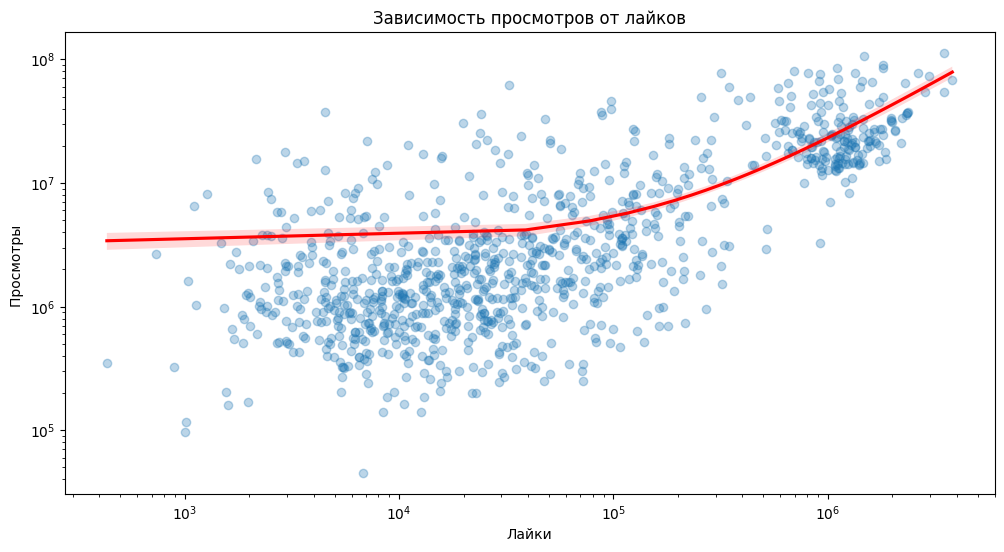

In [137]:
plt.figure(figsize=(12,6))
sns.regplot(
    x='Likes', 
    y='Video views', 
    data=df, 
    scatter_kws={'alpha':0.3}, 
    line_kws={'color':'red'}
)
plt.xscale('log')  # Логарифмическая шкала из-за большого разброса
plt.yscale('log')
plt.title('Зависимость просмотров от лайков')
plt.xlabel('Лайки')
plt.ylabel('Просмотры ')
plt.show()

In [138]:
category_analysis = df.groupby('Category')[['Likes', 'Video views']].median().sort_values('Video views', ascending=False)
print("Медианные значения по категориям:")
print(category_analysis)

Медианные значения по категориям:
                          Likes  Video views
Category                                    
Howto & Style          814056.0   52253406.0
Film & Animation        95471.0   14206642.0
Travel & Events         15192.5    7448295.0
Entertainment           27877.5    6747594.0
Science & Technology    36876.0    6356385.0
Pets & Animals          12918.5    5220061.0
Unknown                 34702.0    3717520.5
Gaming                  55443.5    3482128.0
Sports                  12044.5    3405663.5
People & Blogs          28505.0    3258081.0
Autos & Vehicles        11010.0    2758615.0
Comedy                   7651.0    2751775.0
Education                6506.0    1591632.0
Music                   38689.0    1551825.0
Nonprofits & Activism    6113.0    1098298.0
News & Politics          6196.5     979937.5
